In [492]:
#1、从在线API提取股票数据
#2、用dtw进行相似性分析：dtw越小  两条曲线越相似
#3、先小规模测试，再大量测试

In [1]:
#取出一段时间的数据
import akshare as ak
import pandas as pd
import numpy as np
import tslearn
import tslearn.metrics

'''
symbol:股权编号
period:间隔
'''
#取出被比较的数据
master_symbol="000001"
stock_zh_a_hist_df = ak.stock_zh_a_hist(symbol=master_symbol, period="daily", start_date="20170301", end_date='20170401', adjust="")
choose_df_master=stock_zh_a_hist_df

'''
先尝试两个， 股权编号000002，000004的来对000001进行比较，之后用dtw做相似性评估
'''
#取出在20170301到20170401的数据   000002和000004
symbol1="000048"
symbol2="000062"
################股权编号更改，只要编号存在就，能够成功

choose_df_test1=ak.stock_zh_a_hist(symbol=symbol1, period="daily", start_date="20170301", end_date='20170401', adjust="")
choose_df_test2=ak.stock_zh_a_hist(symbol=symbol2, period="daily", start_date="20170301", end_date='20170501', adjust="")
################日期更改（长度相同不同的一个月）能够成功
################日期更改（长度不同的一个月）能够成功


#曲线救国，把编号也存进去了，
#数据结构 （数据，编号）
#那么取数据就是choose_df_test1[0]，取编号choose_df_test1[1]
choose_df_test1=[choose_df_test1,symbol1]
choose_df_test2=[choose_df_test2,symbol2]

# i_need=pd.DataFrame()

# 在这里考虑将series插入到df中，但是认为日期不必对应，操作不妥
# 所以 继续使用series一个个进行操作 用循环吧



'''
？思考
如果主数据是较长大数据，存在日期包含作比较的数据的情况（此时空值有"默认值"）
那么在进行算法比较应该也是可以得出最相似的曲线

！！！
dtw本来就没有对序列有 相等长度 的要求，但所搜的资料  大都在一段长度相差并不悬殊的数据中
那这个问题就是要找 相同时间序列 或者说长度差不多相等的时间序列？


应尝试：
-1、取相同时间序列，比如同一月份
-2、取不同月份的，但是x轴会不一样，我初看dtw是解决这种问题的，动态的会移动，影响不大
'''

In [2]:
#根据股权编号取到股票名称
#参数是数字或者字符串

def get_name_from_symbol(num):
    stock_zh_a_spot_em_df = ak.stock_zh_a_spot_em()
    if num is not str:
        num = str(num) # 数字转化为字符串        
    num = num.zfill(6) # 字符串右对齐补0
    name=stock_zh_a_spot_em_df[stock_zh_a_spot_em_df["代码"]==num]["名称"]
    return name.values

In [3]:
# #模拟数据测试
# import tslearn
# dataset1=[1,2,3,4,5,6]
# dataset2=[
#     [2,5],
#     [1,2,3,4,5,6],
#     [2,3,4,5,6,7],
#     [1,2,3,4,5,6,7,7,7]
# ]
print(get_name_from_symbol('18'))

['神城A退']


In [4]:
#使用方法
#定义数组，数组中每项是 

#数据结构：list里面存放 (与master比较的dtw,数据,股票编号)

a=[]
#求dtw
dtw_value=tslearn.metrics.dtw(choose_df_master["收盘"], choose_df_test1[0]["收盘"])
#存成上述格式
a.append([dtw_value,choose_df_test1[0],choose_df_test1[1]])

dtw_value=tslearn.metrics.dtw(choose_df_master["收盘"], choose_df_test2[0]["收盘"])
a.append([dtw_value,choose_df_test2[0],choose_df_test2[1]])
#排序
a.sort()
#list中取最小
target=a[0]

股票名称 ['深圳华强']


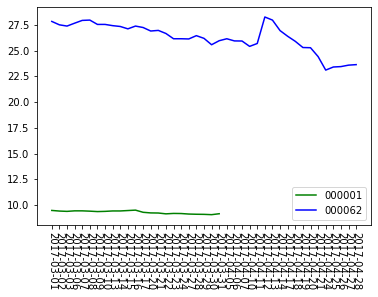

In [5]:
#画图
import matplotlib.pyplot as plt

plt.xticks(rotation=270)
plt.plot(choose_df_master["日期"],choose_df_master["收盘"] , color='green', label=master_symbol)
plt.plot(target[1]["日期"],target[1]["收盘"] , color='blue', label=target[2])
name=get_name_from_symbol(target[2])
print("股票名称",name)
plt.legend()
plt.show()

In [6]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
ss1 = choose_df_master["收盘"]
ss2 =target[1]["收盘"]

path = dtw.warping_path(ss1, ss2)
dtwvis.plot_warping(ss1, ss2, path, filename="imgs/warp1.png")
#生成文件warp.png

(None, None)

![](imgs/warp1.png)

In [ ]:

######
#成功，但不可以批量用，只简单较少组 数据得到最小dtw的曲线。


################股权编号更改，只要编号存在就，能够成功
################日期更改（长度相同不同的一个月）能够成功
################日期更改（长度不同的一个月）能够成功

---
# 引入较多数据

In [7]:
import akshare as ak
import pandas as pd
import numpy as np

stock_zh_a_spot_em_df = ak.stock_zh_a_spot_em()
stock_zh_a_spot_em_df_symbol=stock_zh_a_spot_em_df["代码"]

#根据股权编号取到股票名称
#参数是数字或者字符串

def get_name_from_symbol(num):
    stock_zh_a_spot_em_df = ak.stock_zh_a_spot_em()
    if num is not str:
        num = str(num) # 数字转化为字符串        
    num = num.zfill(6) # 字符串右对齐补0
    name=stock_zh_a_spot_em_df[stock_zh_a_spot_em_df["代码"]==num]["名称"]
    return name.values

In [8]:
#取出被比较的数据
master_symbol="000001"
choose_df_master= ak.stock_zh_a_hist(symbol=master_symbol, period="daily", start_date="20170301", end_date='20170401', adjust="")

In [9]:
#批量取出比较的数据
dataset=[]
#全部取取不动，先取 少个
start=0   #起
n=300     #终
for symbol in stock_zh_a_spot_em_df_symbol[start:n]:
    choose_df=ak.stock_zh_a_hist(symbol=symbol, period="daily", start_date="20170301", end_date='20170401', adjust="")
    
    choose_df=[choose_df,symbol]
    dataset.append(choose_df)

In [10]:
import tslearn
import tslearn.metrics

#找出具有最小dtw的数据
all_values=[]
for i in range(len(np.arange(start,n))):
    dtw_value=tslearn.metrics.dtw(choose_df_master["收盘"], dataset[i][0]["收盘"])
    #dtw有inf的，查了一下是空值，只有股票编码，没有数值的
    all_values.append([dtw_value,dataset[i][0],dataset[i][1]])
    
# dtw_all=[x[0] for x in all_values]  #dtw的值

#按第一列的  dtw值  列排序
out_data = sorted(all_values, key = lambda x:x[0])

target=out_data[0]

股票名称 ['粤桂股份']


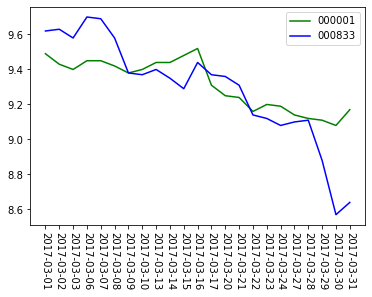

In [11]:
#画图
import matplotlib.pyplot as plt

plt.xticks(rotation=270)
plt.plot(choose_df_master["日期"],choose_df_master["收盘"] , color='green', label=master_symbol)
plt.plot(target[1]["日期"],target[1]["收盘"] , color='blue', label=target[2])
name=get_name_from_symbol(target[2])
print("股票名称",name)
plt.legend()
plt.show()

In [12]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
s1 = choose_df_master["收盘"] 
s2 =target[1]["收盘"]
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path, filename="imgs/warp2.png")
#生成文件warp.png

(None, None)

![](imgs/warp2.png)